<font color= '#067F7D' style = 'font-family:Cambria ; font-size:18px'>Problem Statement Overview: `Web Scraping for Laptop Data` </font><br>

<font color="brown" style="font-family:Cambria ;font-size:15px">`Objective`: To collect a comprehensive `dataset of laptop` specifications by `web scraping e-commerce websites`, `aiming for a minimum of 1500 unique data points`. The dataset will include information such as` processor type, RAM, storage, and display size`.</font>
<br>



<b><font color=green style='font-family:Cambria; font-size:20px'>Steps :</font><b>
<hr style='height:1px'>

<b><font color=black style='font-family:Cambria; font-size:17px'>1. Identify Target Websites: `Flipkart`</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Libraries`: Import necessary libraries like `pandas, numpy, matplotlib, and seaborn.`</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>2. Understand the Website Structure:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>Analyzed the HTML structure of the product listing pages and individual product detail pages to locate relevant data fields.</font>
    <br>
    
- <font color=brown style='font-family:Cambria; font-size:15px'>Investigated the `pagination mechanism` to ensure thorough data extraction across all available pages.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>3. Set Up the Scraping Environment:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>Used `Python` with `libraries` such as `requests` for sending HTTP requests and `BeautifulSoup` for parsing HTML content.</font>
    <br>
    
- <font color=brown style='font-family:Cambria; font-size:15px'>Implemented `random user-agent` rotation to mimic different browsers and avoid detection as a bot.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>4. Extract Data:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>Scraped key information like `laptop name, processor, RAM, storage, and display size` using regular expressions to handle variations in text formatting.</font>
    <br>
    
- <font color=brown style='font-family:Cambria; font-size:15px'>Ensured data cleanliness by handling missing values and inconsistencies.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>5. Challenges Encountered:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Data Limitations`: Flipkart displayed only up to 1000 laptops, despite indicating 80 pages of listings. Further pages failed to load additional data, restricting the dataset size.</font>
    <br>
    
- <font color=brown style='font-family:Cambria; font-size:15px'>`Duplicate Entries`: Variations in product details such as color often led to duplicates, necessitating careful data cleaning to maintain uniqueness.</font>
    <br>
   
<b><font color=black style='font-family:Cambria; font-size:17px'>6. Results:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>Successfully scraped and cleaned a dataset of approximately 1008 unique laptop entries from Flipkart.</font>
    <br>
    
- <font color=brown style='font-family:Cambria; font-size:15px'>`Detailed  reasons` for not meeting the 1500 data point requirement, including website data limitations and duplicate entries. `Kept At END`</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>7. Conclusion:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>The assignment provided valuable insights into the complexities of web scraping, including handling partial data, avoiding detection, and maintaining data integrity.</font>
    <br>
    
- <font color=brown style='font-family:Cambria; font-size:15px'>`Apologized` for the inability to meet the data quantity requirement within the given timeframe due to the  challenges.</font>


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re 


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
laptop_name=[]
laptop_data=[]
price=[]
warrenty=[]

<b><font color= 'Black' style = 'font-family:cambria ; font-size:20px'>Python Requests Module </font></b><br>

<font color="brown" style="font-family:Cambria ;font-size:16px">The `requests` library in Python is a `popular HTTP library` for `making HTTP requests`. It simplifies sending HTTP requests and handling responses, making it easier to interact with web services and APIs. The requests library is widely used due to its `simplicity and versatility` in handling HTTP requests and responses in Python applications.</font><br>

<b><font color= 'black' style = 'font-family:Cambria ; font-size:20px'>BeautifulSoup </font></b><br>

<font color="brown" style="font-family:Cambria ;font-size:16px">The `BeautifulSoup` is a Python library used for parsing `HTML and XML` documents, `primarily used for web scraping tasks`. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse HTML and retrieve tag attributes and `text content` extract `text from entir document`and also Supports different parsers (`html.parser, lxml, html5lib`).</font>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Robot.txt file`</font></b><br>

<font color=brown style='font-family:Cambria; font-size:16px'>A `robots. txt file` contains instructions for bots that tell them which `webpages they can and cannot access`. Robots. txt files are most relevant for `web crawlers` from search engines like Google.</font><br>


<font color=brown style='font-family:Cambria; font-size:16px'>The `User-Agent` header identifies the software making an HTTP request, `like a browser or web scraper`, while `Accept-Language tells` servers the preferred language for content. These headers help `mimic human browsing`, `reducing bot detection` and ensuring relevant content retrieval in the desired language.</font>

<font color=brown style='font-family:Cambria; font-size:16px'>To Avoid From `Access Denied` We Use `User_agent` i.e `user_agent = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36",'Accept-Language':'en-US,en;q=0.5'}`</font>
<br>

#



<font color="blue" style="font-family:Cambria ;font-size:20px">Based On The `Flipkart Website` this `Scrapping is Done`. `Rounded with Color Box` And There `Text with Same Color`</font><br>

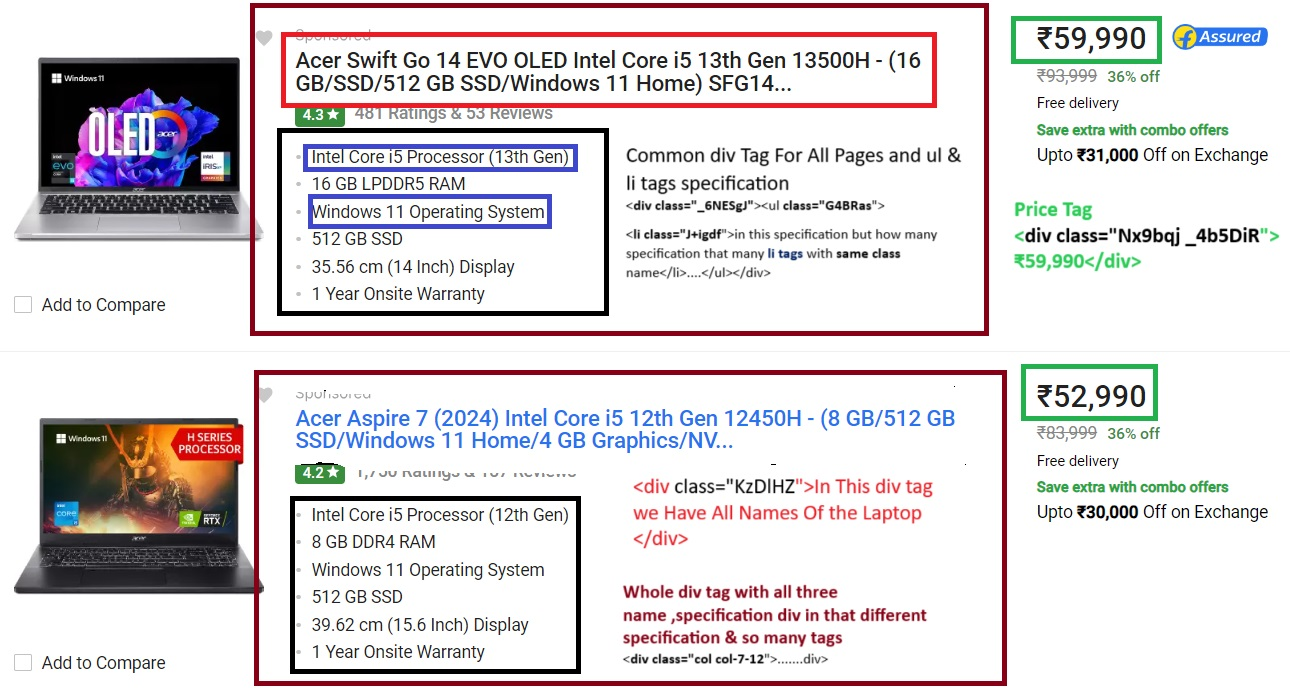

In [3]:
for i in range(0,87):
    url=f'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&as-backfill=on&page={i}'
    user_agent = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36",'Accept-Language':'en-US,en;q=0.5'}
    web_page=requests.get(url,headers=user_agent).text
    soup =BeautifulSoup(web_page,'html.parser')
    
        # Scrape prices and laptop names
    price_elements = soup.find_all('div', class_='Nx9bqj _4b5DiR')
    name_elements = soup.find_all('div', class_='KzDlHZ')
    
    for j in range(len(price_elements)):
        
        price.append(price_elements[j].text)
        
        laptop_name.append(name_elements[j].text)
        
    results=soup.find_all('div',class_='col col-7-12')  # First we are entering into the div of specifications of laptop
    for i in results:                              #looping it
        warr=i.find('ul',class_='G4BRas') # From There we Are entring in to the unorderd list were we have list of specifications

        if warr: # using if statement
            spec_list=warr.find_all('li', class_="J+igdf") # one by one listing the specifications
            last_spec=spec_list[-1].text # from there we are extracting the last element i.e warrenty
            warrenty.append(last_spec)
            
            # Initialize variables for each laptop
            processor = None
            ram = None
            operating_system = None
            display = None
            storage = None
            office= None
            for spec in spec_list:
                spec_text = spec.text.strip().lower()
            
                       # Example: Extract processor
                if 'processor' in spec_text or 'cpu' in spec_text:
                    processor = spec_text
                # Example: Extract RAM
                elif 'ram' in spec_text or 'memory' in spec_text:
                    ram = spec_text
                # Example: Extract operating system
                elif 'os' in spec_text or 'operating system' in spec_text:
                    operating_system = spec_text
                # Example: Extract display
                elif 'display' in spec_text or 'screen' in spec_text:
                    display = spec_text
                #storage
                elif 'storage' in spec_text or 'hdd' in spec_text or 'ssd' in spec_text or 'emmc' in spec_text:
                    storage=spec_text

                 # Additional variations of office terms
                elif 'office' in spec_text or 'ms-office' in spec_text or 'microsoft office' in spec_text or 'wps office' in spec_text:
                    office = spec_text
                    
            # Append data to laptop_data list
            laptop_data.append({
                'Processor': processor,
                'RAM': ram,
                'Operating System': operating_system,
                'Display': display,
                'Storage' : storage,
                'Office': office
                # Add other specifications as needed
            })





In [4]:
df_laptop_data=pd.DataFrame(laptop_data)

df_warrenty=pd.DataFrame(warrenty)

df_warrenty.rename(columns={0:'warrenty'},inplace=True)

df_name_price=pd.DataFrame({'title': laptop_name, 'Price': price})

new=pd.concat([df_laptop_data, df_warrenty], axis=1)

In [5]:
final_df=pd.concat([df_name_price,new],axis=1)

In [6]:
# downloadin this file and doing all the things because when ever i run getting new data so that i am saving it to csv.file
final_df.to_csv('Flipkart_laptop_data.csv')

<b><font color=green style='font-family:Cambria; font-size:20px'>There Are Some Basic Steps :</font><b>
<hr style='height:1px'>

<b><font color=black style='font-family:Cambria; font-size:17px'>1. Data Reading and Understanding:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Libraries`: Import necessary libraries like pandas, numpy, matplotlib, and seaborn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Data`: Read your dataset into a DataFrame using pandas.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Explore Data`: Check the first few rows, data types, and summary statistics to understand the dataset.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>2. Data Preprocessing:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Handle Missing Values`: Impute or remove missing values.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Encode Categorical Variables`: Convert categorical variables into numerical format.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Feature Scaling`: Scale numerical features if needed.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>3. Data Visualization:</font></b><br>


- <font color=brown style='font-family:Cambria; font-size:15px'>`Dist Plots`: Use Dist plots to visualize target variable.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`hist Plots`: Plot hist plots for individual features variable.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>4. Train-Test Split:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Split Data`: Divide the data into training and testing sets.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>5. Model Building:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Import Model`: Import the Linear Regression model from scikit-learn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Fit the Model`: Train the model using the training data.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>6. Model Evaluation:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Predictions`: Make predictions on the test set.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Evaluation Metrics`: Use appropriate metrics (e.g., Mean Squared Error, R-squared) to evaluate the model.</font>



<font color=black style='font-family:Cambria; font-size:19px'>Importing Necessary Libraries</font>

In [7]:

pd.set_option('display.max_columns',150)

pd.set_option('display.max_colwidth', 200)

In [8]:
df=pd.read_csv('Flipkart_laptop_data.csv')

In [9]:
# checkin 4rows
df.head(4)

,title,Price,Processor,RAM,Operating System,Display,Storage,Office,warrenty
0,SAMSUNG Galaxy Book4 Intel Core 5 120U - (8 GB/SSD/512 GB SSD/windows 11 home) NP750XGK-KS1IN / NP750X...,"₹73,990",intel core 5 processor,8 gb lpddr4x ram,windows 11 operating system,39.62 cm (15.6 inch) display,512 gb ssd,no-office,1 Year Manufacturer Warranty for Laptop and 6 Months for In-Box Accessories
1,HP 2023 Intel Core i3 12th Gen 1215U - (8 GB/SSD/512 GB SSD/windows 11 home) 15s-fy5003TU Thin and Lig...,"₹37,990",intel core i3 processor (12th gen),8 gb ddr4 ram,windows 11 operating system,39.62 cm (15.6 inch) display,512 gb ssd,no-office,1 Year Onsite Warranty
2,Apple 2020 Macbook Air Apple M1 - (8 GB/SSD/256 GB SSD/Mac OS Big Sur) MGN63HN/A,"₹68,990",apple m1 processor,8 gb ddr4 ram,mac os operating system,33.78 cm (13.3 inch) display,256 gb ssd,no-office,1 Year Limited Warra­nty
3,HP 255 G9 AMD Ryzen 3 Dual Core R3 3250 - (8 GB/SSD/512 GB SSD/windows 11 home) 255 G8 Business Laptop,"₹25,880",amd ryzen 3 dual core processor,8 gb ddr4 ram,windows 11 operating system,39.62 cm (15.6 inch) display,512 gb ssd,no-office,1 Year Onsite warranty by OEM


In [10]:
df.shape
print(f'The Shape of The data set {df.shape}')

The Shape of The data set (1008, 9)


In [11]:
# checking null values
df.isnull().sum()

title               4
Price               0
Processor           0
RAM                 0
Operating System    0
Display             0
Storage             0
Office              0
warrenty            0
dtype: int64

In [12]:
# Checking duplicates
df.duplicated().sum()

279

<font color=blue style='font-family:Cambria; font-size:19px'>Dropping Duplicates</font>

In [13]:

df.drop_duplicates(inplace=True)


In [14]:
df=df.reset_index()
df.drop(columns='index',axis=1,inplace=True)

<font color=blue style='font-family:Cambria; font-size:19px'>Checking Shape After Droping Duplicates</font>


In [15]:
print(f'The Shape of The data set after dropping duplicates {df.shape}')

The Shape of The data set after dropping duplicates (729, 9)


In [16]:
df['Price'].head(5)

0    ₹73,990
1    ₹37,990
2    ₹68,990
3    ₹25,880
4    ₹65,990
Name: Price, dtype: object

<font color=blue style='font-family:Cambria; font-size:19px'>Price Column Has `₹` and not in a good Format Remvoing `rupees symbol and commo`</font>

In [17]:
df['Price']=df['Price'].str.replace('₹',' ').str.replace(',', '').astype(int)

In [18]:
df['Price'].head(5)

0    73990
1    37990
2    68990
3    25880
4    65990
Name: Price, dtype: int32

<font color=blue style='font-family:Cambria; font-size:19px'>Checking All Columns In A Data Frame If There Any Need Of Cleaning The Column Cleaning It</font>

In [19]:
df['Processor']

0                  intel core 5 processor
1      intel core i3 processor (12th gen)
2                      apple m1 processor
3         amd ryzen 3 dual core processor
4      intel core i5 processor (13th gen)
                      ...                
724    intel core i5 processor (11th gen)
725          intel core ultra 5 processor
726          intel core ultra 7 processor
727    intel core i5 processor (12th gen)
728    intel core i7 processor (12th gen)
Name: Processor, Length: 729, dtype: object

In [20]:
# processor
df['Processor'].value_counts().to_frame()

,count
Processor,
intel core i5 processor (12th gen),79
intel core 5 processor,49
intel core i3 processor (12th gen),49
intel core i5 processor (13th gen),49
intel core i7 processor (13th gen),48
intel core ultra 7 processor,48
amd ryzen 5 hexa core processor,43
intel core i5 processor (11th gen),41
amd ryzen 7 octa core processor,40


In [21]:
# colum ram
df['RAM']

0       8 gb lpddr4x ram
1          8 gb ddr4 ram
2          8 gb ddr4 ram
3          8 gb ddr4 ram
4       16 gb lpddr5 ram
             ...        
724        8 gb ddr4 ram
725    16 gb lpddr5x ram
726    32 gb lpddr5x ram
727       16 gb ddr4 ram
728       16 gb ddr4 ram
Name: RAM, Length: 729, dtype: object

In [22]:
df['RAM'].value_counts().to_frame()

,count
RAM,
8 gb ddr4 ram,218
16 gb ddr4 ram,145
16 gb ddr5 ram,55
16 gb lpddr4x ram,52
8 gb lpddr4x ram,44
16 gb lpddr5 ram,42
16 gb lpddr5x ram,42
32 gb lpddr5x ram,35
8 gb lpddr5 ram,33


<font color=blue style='font-family:Cambria; font-size:19px'>Cleaning The `Operating System` Because Some Of Them Are `Not Correclty Classified`</font>

In [23]:
df['Operating System'].value_counts()

Operating System
windows 11 operating system               402
64 bit windows 11 operating system        182
windows 11 home                            61
mac os operating system                    24
64 bit windows 10 operating system          9
chrome operating system                     8
dos operating system                        8
64 bit windows 11 home                      7
microsoft office home and student 2019      5
windows 10 operating system                 4
wps office, operating system software       3
microsoft office home and student           2
microsoft office 2021 home & student        2
windows 11 home h&s 2021                    2
64 bit dos operating system                 2
dos                                         2
windows 11 home,windows 11 home             1
32 bit windows 11 operating system          1
linux/ubuntu operating system               1
64 bit chrome operating system              1
android operating system                    1
windows 11 home  

<font color=blue style='font-family:Cambria; font-size:18px'>Here We Are Using The List Of Items And Ittreating Through Loop From There We Are Inserting It Into Differernt Values `Windows 11 Operating System,Chrome Operating System, Dos Operating System, Windows 10 Operating System , Windows 11 Home`</font>

In [24]:
# windows 11 operating system
listos=['wps office, operating system software',
        '64 bit windows 11 operating system',
       'windows 11 operating system']
for i in listos:
    df['Operating System']=df['Operating System'].apply(lambda x: 'windows 11 operating system' if i in x else x)

In [25]:
# chrome operating system
df['Operating System']=df['Operating System'].apply(lambda x: 'chrome operating system' if '64 bit chrome operating system' in x else x)

In [26]:
# dos operating system
listos=['64 bit dos operating system','dos']
for i in listos:
    df['Operating System']=df['Operating System'].apply(lambda x: 'dos operating system' if i in x else x)


In [27]:
# windows 10 operating system
listos=['64 bit windows 10 operating system']

for i in listos:
    df['Operating System']=df['Operating System'].apply(lambda x: 'windows 10 operating system' if i in x else x)

In [28]:
# windows 11 home
listos=['64 bit windows 11 home',
        'microsoft office 2021 home & student',
        'microsoft office home and student 2019',
        'microsoft office home and student','windows 11 home',
        'windows 11 home,windows 11 home',
       '32 bit windows 11 operating system	']
print(i)
for i in listos:
    df['Operating System']=df['Operating System'].apply(lambda x: 'windows 11 home' if i in x else x)

64 bit windows 10 operating system


In [29]:
df['Operating System'].value_counts().to_frame().reset_index()

,Operating System,count
0,windows 11 operating system,588
1,windows 11 home,81
2,mac os operating system,24
3,windows 10 operating system,13
4,dos operating system,12
5,chrome operating system,9
6,android operating system,1
7,linux/ubuntu operating system,1


<font color=brown style='font-family:Cambria; font-size:19px'>`Storage Column`</font>

In [30]:
df['Storage'].value_counts().to_frame()

,count
Storage,
512 gb ssd,522
1 tb ssd,134
256 gb ssd,46
1 tb hdd|256 gb ssd,7
2 tb ssd,6
128 gb emmc,5
64 gb emmc,4
128 gb ssd,3
1 tb hdd,2


<font color=blue style='font-family:Cambria; font-size:19px'>Cleaning `Office` Column</font>

In [31]:
df['Office'].value_counts().to_frame().reset_index()

,Office,count
0,no-office,646
1,ms office home and student 2021,65
2,office home & student 2021,6
3,ms office,3
4,office home and student 2021,3
5,office trial,2
6,office home and student 2019,1
7,software: win 11 + office h&s 2021,1
8,windows 11 and ms office,1
9,"myasus, office home and student 2019, link to myasus, splendid, tru2life",1


In [32]:
# ms office home and student 2021
listoff=['office home & student 2021',
       'office home and student 2021',
        'software: win 11 + office h&s 2021'
        
       ]
for i in listoff:
    df['Office']=df['Office'].apply(lambda x: 'ms office home and student 2021' if i in x else x)

In [33]:

df['Office']=df['Office'].apply(lambda x: 'ms office' if 'windows 11 and ms office' in x else x)

In [34]:
df['Office']=df['Office'].apply(lambda x: 'office home and student 2019' if 'myasus, office home and student 2019, link to myasus, splendid, tru2life' in x else x)

In [35]:
df['Office'].value_counts().to_frame().reset_index()

,Office,count
0,no-office,646
1,ms office home and student 2021,75
2,ms office,4
3,office trial,2
4,office home and student 2019,2


<font color=brown style='font-family:Cambria; font-size:19px'>`Display Column`</font>

In [36]:
df['Display']

0                39.62 cm (15.6 inch) display
1                39.62 cm (15.6 inch) display
2                33.78 cm (13.3 inch) display
3                39.62 cm (15.6 inch) display
4                  35.56 cm (14 inch) display
                        ...                  
724              39.62 cm (15.6 inch) display
725    35.56 cm (14 inch) touchscreen display
726    35.56 cm (14 inch) touchscreen display
727              39.62 cm (15.6 inch) display
728              39.62 cm (15.6 inch) display
Name: Display, Length: 729, dtype: object

<font color=blue style='font-family:Cambria; font-size:19px'>Creating a `new column` of display column `normal display & Touch screen display`</font>

In [37]:
df['Display_type']=df['Display'].apply(lambda x: ' '.join(x.split(' ')[4:]))

In [38]:
df['Display_type']=df['Display_type'].apply(lambda x : 'Normal_Dispay' if x=='display' else 'Touch_Screen_dispaly')

In [39]:
df['Display_type']

0             Normal_Dispay
1             Normal_Dispay
2             Normal_Dispay
3             Normal_Dispay
4             Normal_Dispay
               ...         
724           Normal_Dispay
725    Touch_Screen_dispaly
726    Touch_Screen_dispaly
727           Normal_Dispay
728           Normal_Dispay
Name: Display_type, Length: 729, dtype: object

<font color=blue style='font-family:Cambria; font-size:19px'>Extracting a `New Column` From `Display` COlumn</font>

In [40]:
df['Screen_inches']=df['Display'].str.extract('\((.*?)\)')

In [41]:
df['Screen_inches'].head(4)

0    15.6 inch
1    15.6 inch
2    13.3 inch
3    15.6 inch
Name: Screen_inches, dtype: object

In [42]:
df['Screen_inches']=df['Screen_inches'].apply(lambda x: x[:-4]).astype(float)

In [43]:
df['Screen_inches'].head(4)

0    15.6
1    15.6
2    13.3
3    15.6
Name: Screen_inches, dtype: float64

<font color=blue style='font-family:Cambria; font-size:19px'>Creating A New Colum `Screen_Size_Category` From `Screen_Inches` Column</font>

In [44]:
bins = [0, 12, 12.9, 13.9, 14.9, 15.9, 17.9, 20, float('inf')]
labels = [
    'Below 12 inch',
    '12 inch - 12.9 inch',
    '13 inch - 13.9 inch',
    '14 inch - 14.9 inch',
    '15 inch - 15.9 inch',
    '16 inch - 17.9 inch',
    '18 inch - 20 inch',
    'Above 20 inch'
]

In [45]:
df['Screen_size_category']=pd.cut(df['Screen_inches'], bins=bins, labels=labels, right=False)

In [46]:
df['Screen_size_category'].value_counts().to_frame().reset_index()

,Screen_size_category,count
0,15 inch - 15.9 inch,406
1,14 inch - 14.9 inch,194
2,16 inch - 17.9 inch,94
3,13 inch - 13.9 inch,21
4,Above 20 inch,10
5,Below 12 inch,4
6,12 inch - 12.9 inch,0
7,18 inch - 20 inch,0


In [47]:
df['Laptop_price']=df['Price']


<font color=blue style='font-family:Cambria; font-size:19px'>Dropping Some Columns</font>

In [48]:
df.drop(columns=['Display'],axis=1,inplace=True)
df.drop(columns=['Price'],axis=1,inplace=True)
df.drop(columns=['title'],axis=1,inplace=True)

In [49]:
df.head(5)

,Processor,RAM,Operating System,Storage,Office,warrenty,Display_type,Screen_inches,Screen_size_category,Laptop_price
0,intel core 5 processor,8 gb lpddr4x ram,windows 11 operating system,512 gb ssd,no-office,1 Year Manufacturer Warranty for Laptop and 6 Months for In-Box Accessories,Normal_Dispay,15.6,15 inch - 15.9 inch,73990
1,intel core i3 processor (12th gen),8 gb ddr4 ram,windows 11 operating system,512 gb ssd,no-office,1 Year Onsite Warranty,Normal_Dispay,15.6,15 inch - 15.9 inch,37990
2,apple m1 processor,8 gb ddr4 ram,mac os operating system,256 gb ssd,no-office,1 Year Limited Warra­nty,Normal_Dispay,13.3,13 inch - 13.9 inch,68990
3,amd ryzen 3 dual core processor,8 gb ddr4 ram,windows 11 operating system,512 gb ssd,no-office,1 Year Onsite warranty by OEM,Normal_Dispay,15.6,15 inch - 15.9 inch,25880
4,intel core i5 processor (13th gen),16 gb lpddr5 ram,windows 11 operating system,512 gb ssd,no-office,1 Year Onsite Warranty,Normal_Dispay,14.0,14 inch - 14.9 inch,65990


In [50]:
pd.set_option('display.max_rows',80)

<font color=blue style='font-family:Cambria; font-size:19px'>Cleaning `Warrenty` Column</font>

In [51]:
df['warrenty']=df['warrenty'].str.lower()

In [52]:
df['warrenty'].value_counts().to_frame().reset_index()

,warrenty,count
0,1 year onsite warranty,333
1,1 year manufacturer warranty for laptop and 6 months for in-box accessories,122
2,1 year carry-in warranty,47
3,2 year carry-in warranty,31
4,1 year warranty,27
5,1 year onsite hardware service,21
6,1 year limited warranty,19
7,1 year international travelers warranty (itw),19
8,1 year,12
9,1 year domestic warranty,11


<font color=blue style='font-family:Cambria; font-size:19px'>As You See The Above Dataframe There Are `63 Rows OF Different Warranty`. The Warranty Has Been Be Separated In A Various Format Arrange Them In A Format</font>

<font color=blue style='font-family:Cambria; font-size:19px'>Normal `1 Year` Warrenty</font>

In [53]:
# created a list of names of warranty which can go in to the 1 year warranty
listwarr=[
    '1 year carry-in warranty',
    '1 year warranty',
    '1 year limited warranty',
    
#     '1 year',
    '1 year domestic warranty',
    '1-year warranty',
    '1 year manufacturing warranty',
    '1 years manufacturer warranty',
    '1 year manufacturer warranty',
    '1 year manufacturer warranty on the device and 6 months manufacturer warranty on included accessories from the date of purchase',
    '12 months',
    '1 year domestic brand warranty on device',
    '1 year warranty term',
    '1 year domestic',
    '1 year lenovo',
    '1 year manufacturer',
    '1 year limited warra­nty' 
    
    
]

for i in listwarr:
    df['warrenty']=df['warrenty'].apply(lambda x: '1 years' if i in x else x)

<font color=blue style='font-family:Cambria; font-size:19px'> `1 Year Onsite` Warrenty</font>

In [54]:
# 1year Onsite  warrenty
listwarr=[
    '1 year onsite',
    '1 year onsite premium support',
    '1 year onsite warrenty   f1',
    '1 year on-site warranty',
    '1year onsite warranty',

    '1 year premium support',
    '1 year onsite warranty by oem',
    '1 year from brand',
    '1 years onsite?warranty',
    '1 year onsite warranty + 1 year legion ultimate support',
    '1 year onsite warranty + 1year premium care',
    '1 year onsite domestic warranty',
    '1 year in-home hardware service',
    '1 year standard warranty',
    '1 year onsite premium support with 1 year onsite warranty' ]

for i in listwarr:
    df['warrenty']=df['warrenty'].apply(lambda x: '1 year onsite warranty' if i in x else x)

<font color=blue style='font-family:Cambria; font-size:19px'> `1 Year International` Warrenty</font>

In [55]:
# 1 year international warerenty  
listwarr=['one-year international travelers warranty',
 '1 year international travelers warranty',
 '1 year international',
 '1 year international warranty',
]

for i in listwarr:
    df['warrenty']=df['warrenty'].apply(lambda x: '1 year international travelers warranty (itw)' if i in x else x)

<font color=blue style='font-family:Cambria; font-size:19px'> `1 Year` Warrenty with `ADP(Accidental Damage Protection)`</font>

In [56]:
# 1 year warrenty with 1 year adp (accidental damange protection)
listwarr=[
    
       '1 year onsite�warranty�+ 1 yr adp',
    '1 year onsite warranty + 1 year premium care + 1 year adp',
    '1 year onsite warranty + 1 year accidental damage protection add on',
     '1 year onsite warranty + 1 year adp',
    '1 year warranty + 1 year premium care + 1 year adp'
]
for i in listwarr:
    df['warrenty']=df['warrenty'].apply(lambda x: '1 yr onsite warranty + 1 yr premium care' if i in x else x)


<font color=blue style='font-family:Cambria; font-size:19px'> `2 Year ` Warrenty</font>

In [57]:
# 2year warrenty
listwarr=[
    '2 year warranty term',
    '2 year warranty',
    '2 years warranty',
    '2 year on-site & carry-in warranty',
    '2 year carry-in or onsite',
    '2 year carry-in warranty term',
    '18 months warranty + 6 months extended warranty (6 months extended warranty upon online product registration on www.avita-india.com)'
]
for i in listwarr:
    df['warrenty']=df['warrenty'].apply(lambda x: '2 year carry-in warranty' if i in x else x)


<font color=blue style='font-family:Cambria; font-size:19px'> `3 Year ` Warrenty</font>

In [58]:
# 3 years warrenty
listwarr=[
    '3 year domestic',
    '3 year onsite warranty',
    '3 year manufacturer warranty on the device and 6 months manufacturer warranty on included accessories from the date of purchase',
    '3 years onsite�warranty�+ 3 years legion ultimate support + 1 year accidental damage protection',
    '3-year'
    
    
]
for i in listwarr:
    df['warrenty']=df['warrenty'].apply(lambda x: '3 years' if i in x else x)

<font color=blue style='font-family:Cambria; font-size:19px'> Finally Warrenty Column has Organized</font>

In [59]:
df['warrenty'].value_counts().to_frame().reset_index()

,warrenty,count
0,1 year onsite warranty,388
1,1 years,258
2,2 year carry-in warranty,38
3,1 year international travelers warranty (itw),25
4,1 year,12
5,3 years,6
6,1 yr onsite warranty + 1 yr premium care,2


<font color=blue style='font-family:Cambria; font-size:19px'>All Columns Detail Analsys has Done</font>

<font color=black style='font-family:Cambria; font-size:19px'> Exploratory Data Analysis `EDA` & `Insights`</font>

In [60]:
df.head()

,Processor,RAM,Operating System,Storage,Office,warrenty,Display_type,Screen_inches,Screen_size_category,Laptop_price
0,intel core 5 processor,8 gb lpddr4x ram,windows 11 operating system,512 gb ssd,no-office,1 years,Normal_Dispay,15.6,15 inch - 15.9 inch,73990
1,intel core i3 processor (12th gen),8 gb ddr4 ram,windows 11 operating system,512 gb ssd,no-office,1 year onsite warranty,Normal_Dispay,15.6,15 inch - 15.9 inch,37990
2,apple m1 processor,8 gb ddr4 ram,mac os operating system,256 gb ssd,no-office,1 years,Normal_Dispay,13.3,13 inch - 13.9 inch,68990
3,amd ryzen 3 dual core processor,8 gb ddr4 ram,windows 11 operating system,512 gb ssd,no-office,1 year onsite warranty,Normal_Dispay,15.6,15 inch - 15.9 inch,25880
4,intel core i5 processor (13th gen),16 gb lpddr5 ram,windows 11 operating system,512 gb ssd,no-office,1 year onsite warranty,Normal_Dispay,14.0,14 inch - 14.9 inch,65990


In [61]:
df['Processor']

0                  intel core 5 processor
1      intel core i3 processor (12th gen)
2                      apple m1 processor
3         amd ryzen 3 dual core processor
4      intel core i5 processor (13th gen)
                      ...                
724    intel core i5 processor (11th gen)
725          intel core ultra 5 processor
726          intel core ultra 7 processor
727    intel core i5 processor (12th gen)
728    intel core i7 processor (12th gen)
Name: Processor, Length: 729, dtype: object

<b><font color=black style='font-family:Cambria; font-size:17px'> `Processor Count` Insights:</font></b><br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>The `Most Common Processor` Among The Listed Ones Is The `Intel Core I5 Processor (12th Gen)` With A Count `Close To 80`.</font>
<br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>`Other Popular Processors` Include `Amd Ryzen 5 Quad Core Processor, Intel Core I5 Processor (13th Gen), And Intel Core I7 Processor (11th Gen)`, Each With A Significant Count.</font>
<br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>The Graph Shows A Wide Variety Of Processor Types, `Highlighting A Mix Of Intel And AMD Processors` Across Different Generations And Core Counts.</font>
<br>



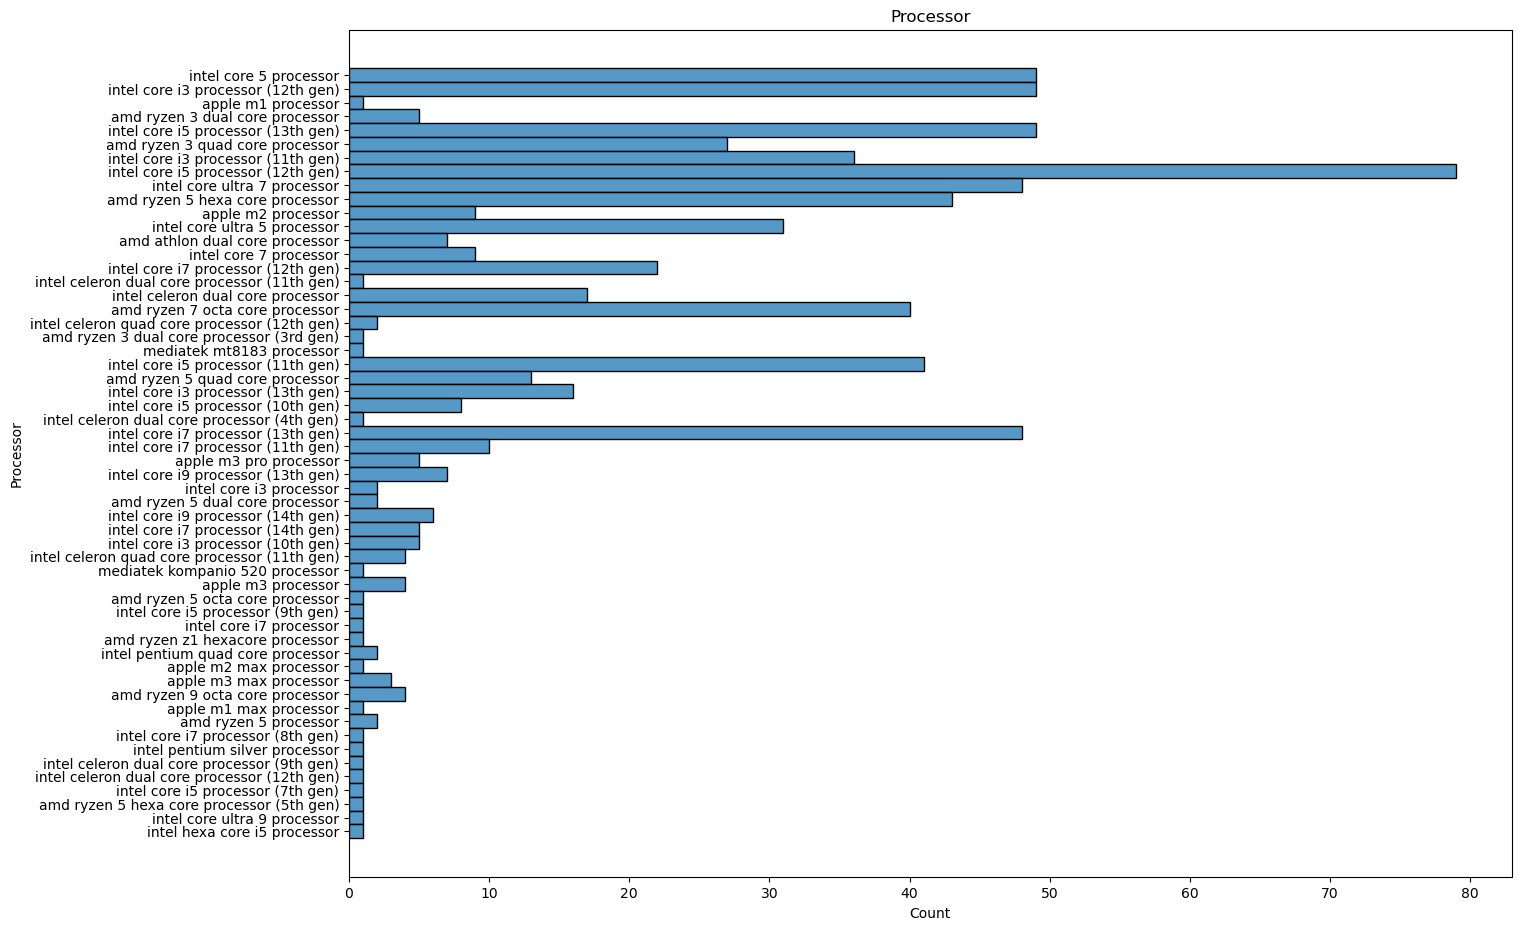

In [62]:
plt.figure(figsize=(15,11))
plt.title("Processor")

sns.histplot(y=df['Processor'])
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `RAM Distribution` Insights:</font></b><br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>The `Most Common RAM Configurations` Are `8 GB DDR4 RAM` And `16 GB DDR4 RAM`, With Counts `Exceeding 200`.</font>
<br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>There Is A Notable Usage Of `8 GB LPDDR4X RAM` And `16 GB LPDDR4X RAM`.</font>
<br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>High RAM Capacities Like `32 GB DDR4 RAM` And `64 GB DDR5 RAM` Are Less Common But Still Present.</font>
<br>

- <font color=BLUE style='font-family:Cambria; font-size:15px'>The Distribution Suggests A Preference For Mid-Range RAM Capacities (`8 GB` And `16 GB`), With High-End Configurations Being Less Frequent.</font>
<br>



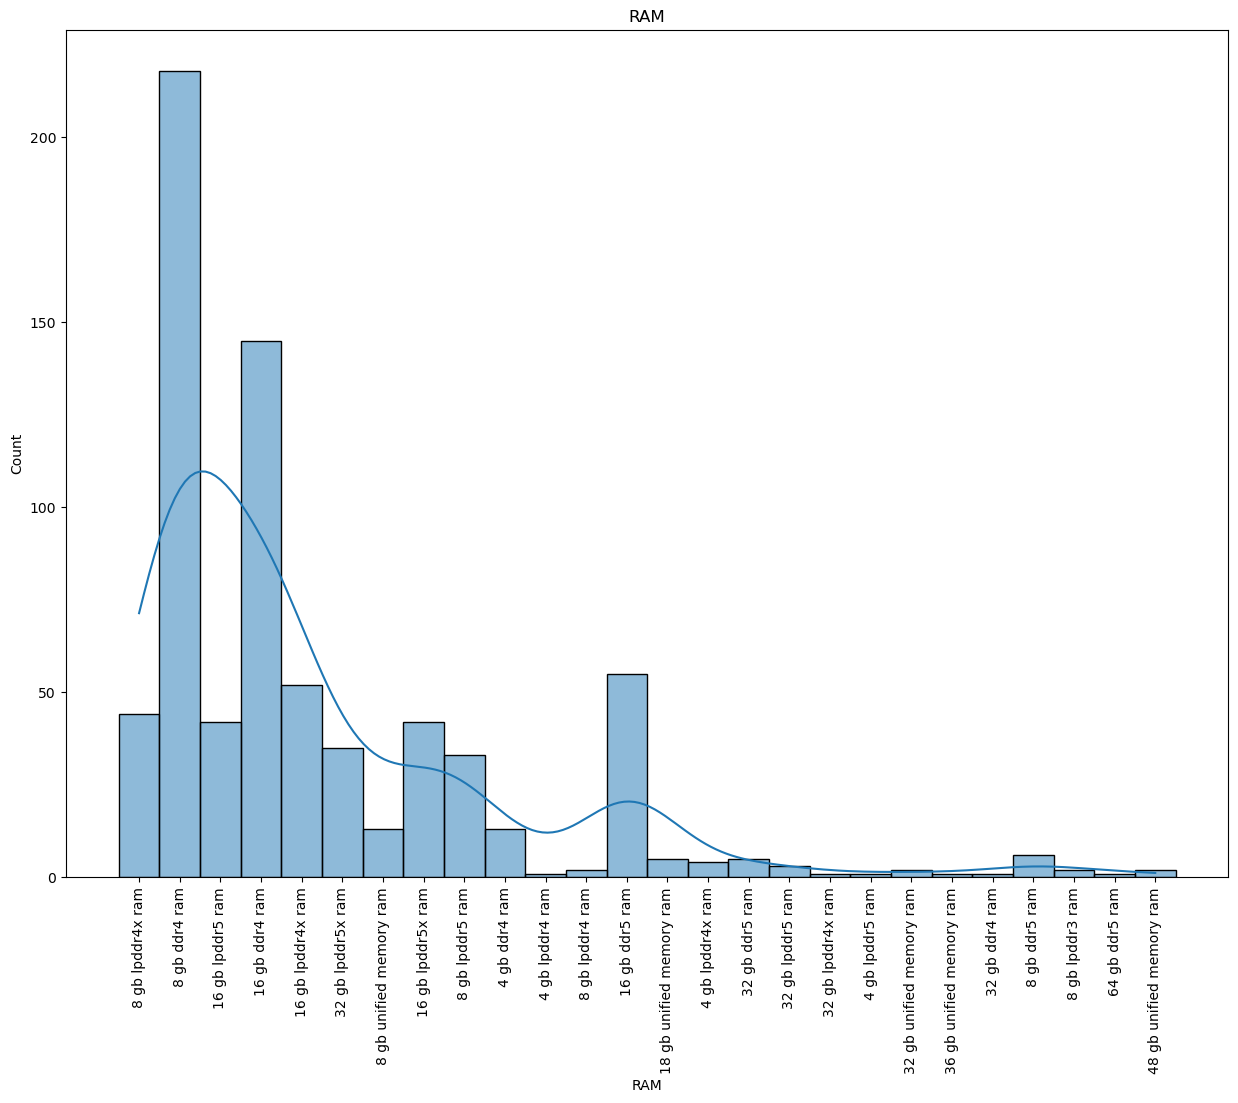

In [63]:
plt.figure(figsize=(15,11))
sns.histplot(x=df['RAM'],kde=True)
plt.title("RAM")

plt.xticks(rotation=90)
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Various Laptop Features` Insights:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`MS - Office`: The Majority Of Laptops Do Not Come With MS Office Pre-Installed, With `No-Office` Being The Most Common Category.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Display Type`: Most Laptops Feature A `Normal Display` As Opposed To `Touch Screen Display`.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Laptop Price`: The Box Plot Indicates A Wide Range Of Laptop Prices, With Most Falling Below `100,000`, But Several Outliers Reaching Up To `400,000`.</font>
<br>



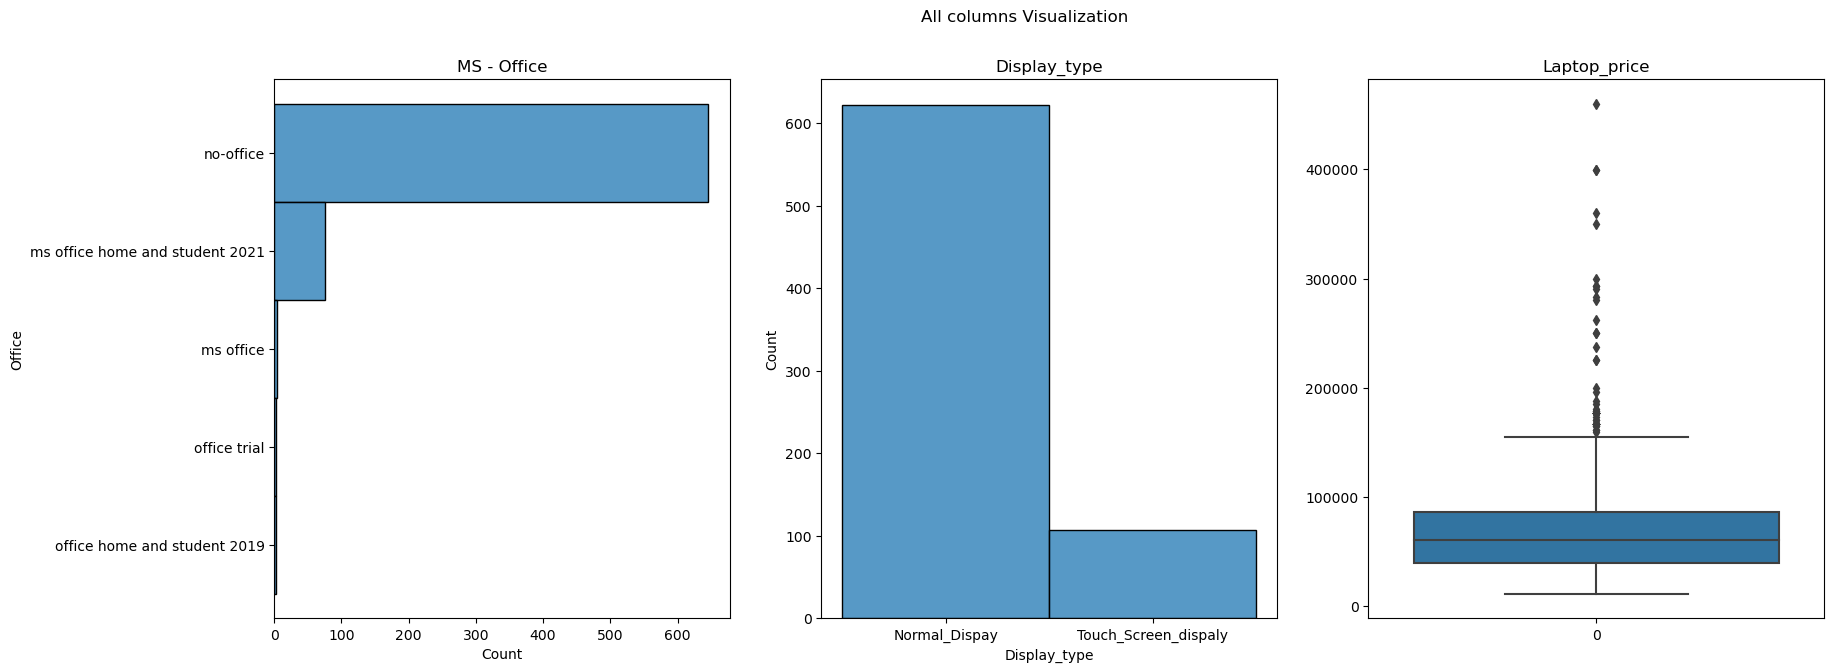

In [64]:
plt.figure(figsize=(20,7))
plt.suptitle('All columns Visualization')
plt.subplot(1,3,1)
sns.histplot(y=df['Office'])
# plt.xticks(rotation=90)
plt.title("MS - Office")
plt.subplot(1,3,2)
sns.histplot(df['Display_type'])
plt.title("Display_type")

plt.subplot(1,3,3)



sns.boxplot(df['Laptop_price'],orient='v')
plt.title("Laptop_price")
plt.show()

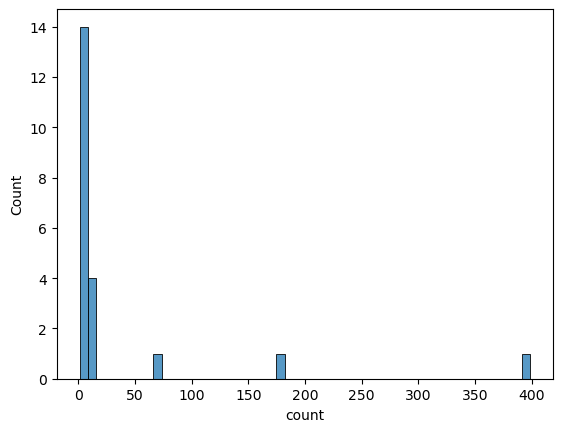

In [65]:
sns.histplot(df['Screen_inches'].value_counts())
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Warranty Types` Insights:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `Most Common Warranty Period` Offered Is `1 Year Onsite Warranty` And `3 Years`, Each With Significant Counts.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Lesser-Offered Warranties Include `2 Year Carry-In Warranty` And Various Combinations Of Extended Warranties And Premium Care.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>There Is A Preference For Providing A Standard `One Or Three-Year Warranty`, With Other Types Being Relatively Uncommon.</font>
<br>



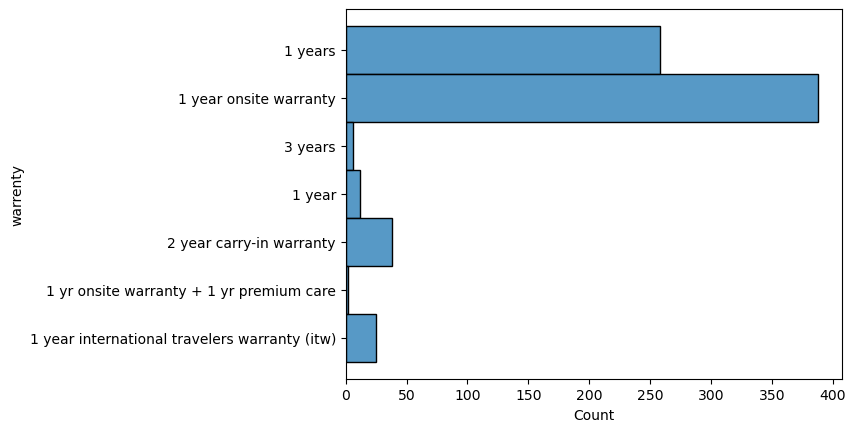

In [66]:
sns.histplot(y=df['warrenty'])
plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Operating Systems` Insights:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `Most Common Operating System` Is `Windows 11`, Followed By `Windows 11 Home`.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Other Operating Systems Like `Mac OS`, `DOS`, And `Chrome OS` Have Much Lower Counts.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>There Is A `Clear Preference` For `Windows Operating Systems`, Particularly The Latest Version.</font>

<Axes: xlabel='Count', ylabel='Operating System'>

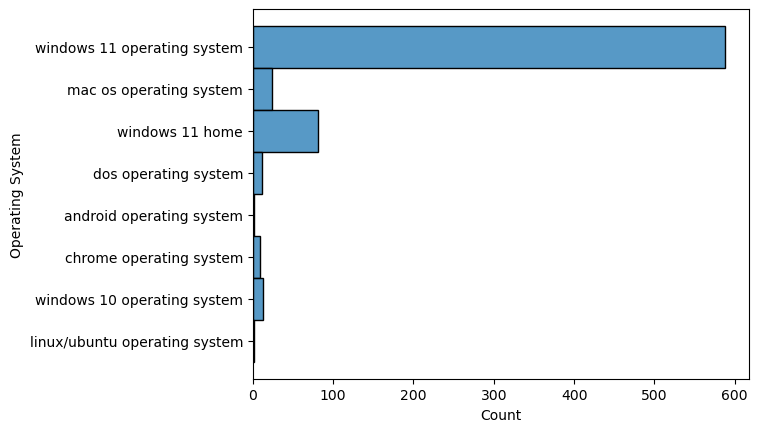

In [67]:
sns.histplot(y=df['Operating System'])

<b><font color=black style='font-family:Cambria; font-size:17px'> `Storage Type` Insights:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `Most Common Storage Type` is `512 GB SSD`, with a count of around 500 units.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Other common storage types include `1 TB SSD` and `256 GB SSD`, with counts of around 100 units each.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Smaller counts are observed for `64 GB eMMC`, `1 TB HDD`, `256 GB HDD`, `128 GB eMMC`, `128 GB SSD`, and `2 TB SSD`.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The `Least Popular Storage Types` are `2 TB SSD` and `1 TB HDD`.</font>
<br>


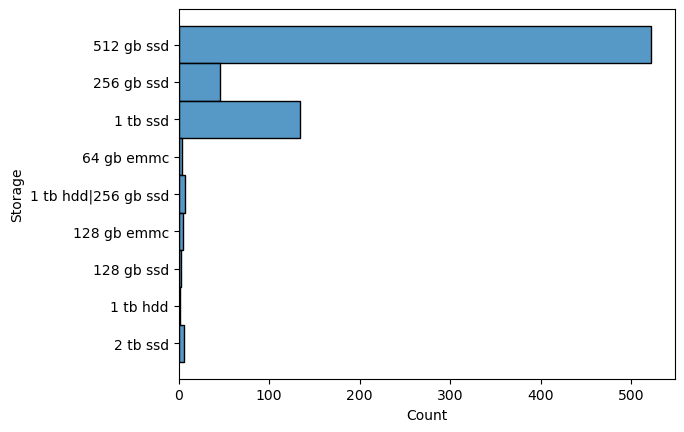

In [68]:
sns.histplot(y=df['Storage'])
plt.show()


<b><font color=black style='font-family:Cambria; font-size:17px'> `Laptop Prices` Insights:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The price distribution of laptops shows a `right-skewed pattern`, with most laptops priced towards the lower end of the spectrum.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The majority of laptops are priced below `₹100,000`, with the highest peak around the `₹40,000 to ₹50,000` range.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>There are fewer laptops as the price increases, with significant drops beyond `₹100,000`.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>There are some `high-end laptops` priced up to `₹400,000`, but they are rare compared to more affordable models.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The data suggests that the market is dominated by `more affordable laptops`, with demand significantly dropping as the price increases.</font>


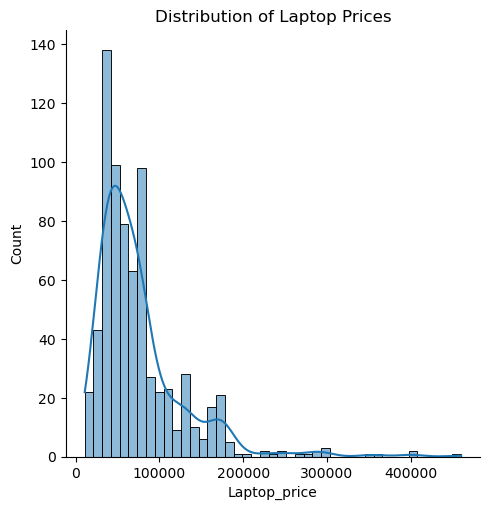

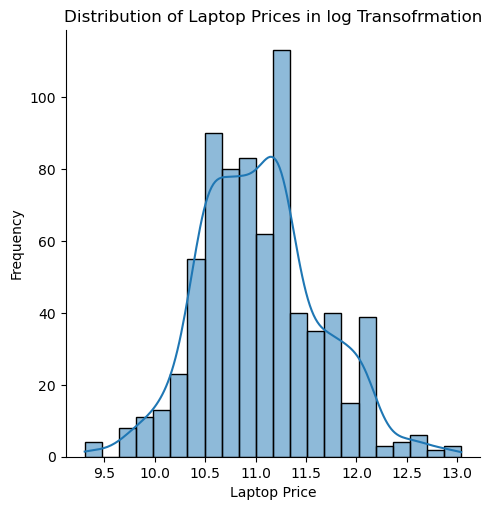

In [69]:

sns.displot(data=df, x='Laptop_price', kde=True)
plt.title('Distribution of Laptop Prices')

sns.displot(np.log(df['Laptop_price']), kde=True)

plt.xlabel('Laptop Price')
plt.ylabel('Frequency')


plt.title('Distribution of Laptop Prices in log Transofrmation')
plt.xlabel('Laptop Price')
plt.ylabel('Frequency')

plt.show()

<b><font color=black style='font-family:Cambria; font-size:17px'> `Log Transformation`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>The log transformation is commonly used to transform `right-skewed data` into a `more symmetrical distribution`. It compresses the range of values and `reduces the impact of outliers`. This transformation is particularly effective when the data spans several orders of magnitude.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Formula: log(x)`</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>However, the log transformation has a limitation: it `cannot` handle `zero or negative` values because the logarithm of zero or a negative number is `undefined`.</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Log1p Transformation`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>To overcome the limitation of the log transformation, especially when `dealing with zero values`, the `log1p transformation is used`. This transformation applies the natural logarithm to `(x+1)`, allowing it to handle zero values.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Formula: log1p(x) = log(x + 1)`</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>This transformation is useful when your data includes zero values or when you want a more stable transformation that doesn't change the data range too drastically for small values.</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Comparison and Application`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Log Transformation`:<br>
    - Usage: When data does not contain zero or negative values.<br>
    - Effect: Strongly reduces the skewness by compressing large values.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Log1p Transformation`:<br>
    - Usage: When data contains zero values or small positive values.<br>
    - Effect: Similar to log transformation but can handle zero values and is slightly less aggressive for small values.</font>


In [70]:
# df['Laptop_price'] is  target column with outliers
target_column = df['Laptop_price']

# Appling log transformation
transformed_target = np.log(target_column)

# Update the DataFrame with transformed values
df['Laptop_price_log'] = transformed_target

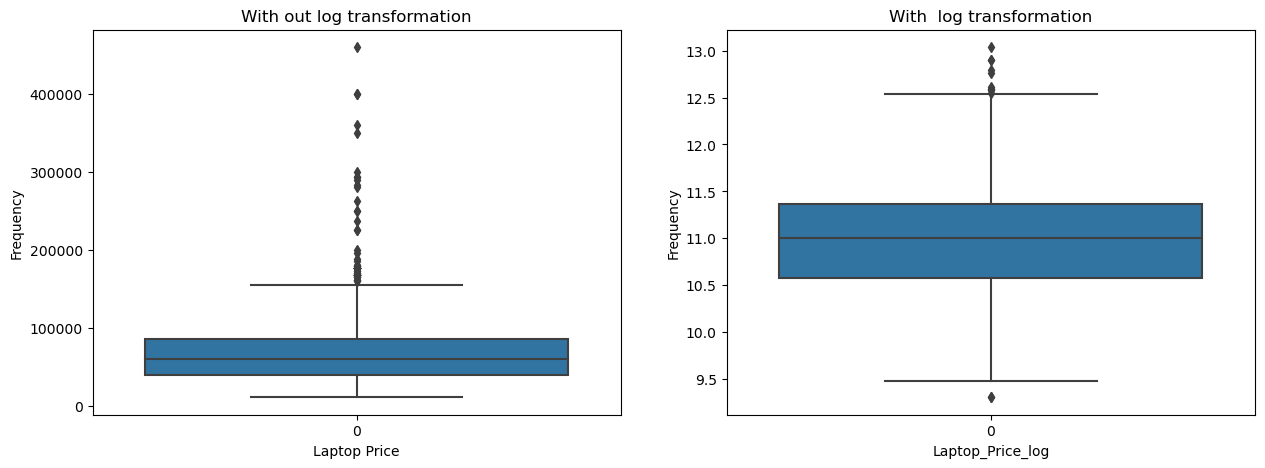

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['Laptop_price'])
plt.title('With out log transformation')
plt.xlabel('Laptop Price')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(df['Laptop_price_log'])
plt.title('With  log transformation')

plt.xlabel('Laptop_Price_log')
plt.ylabel('Frequency')
plt.show()

<font color=blue style='font-family:Cambria; font-size:19px'> Data is Normally Distributed</font>

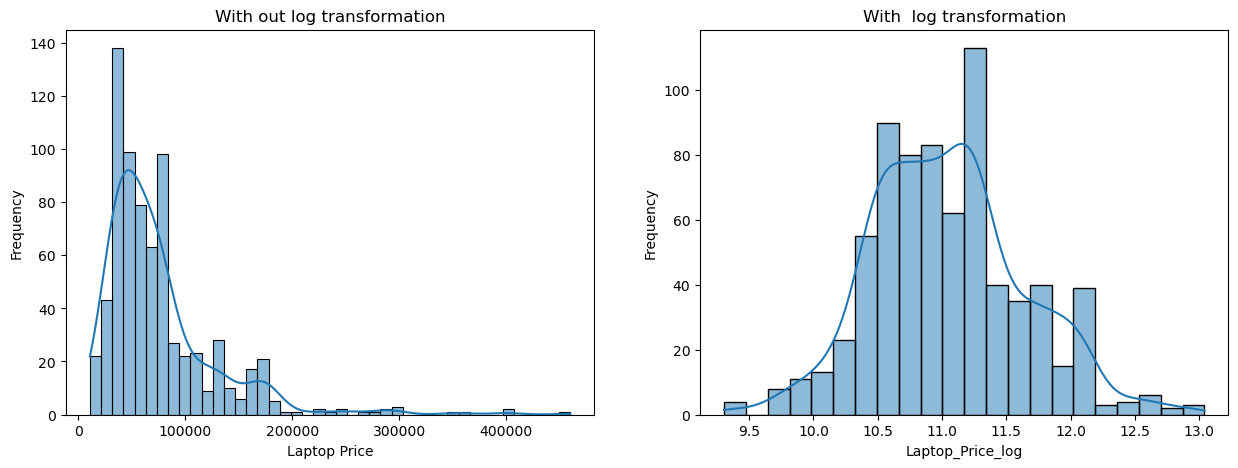

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['Laptop_price'],kde=True)
plt.title('With out log transformation')
plt.xlabel('Laptop Price')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['Laptop_price_log'],kde=True)
plt.title('With  log transformation')

plt.xlabel('Laptop_Price_log')
plt.ylabel('Frequency')
plt.show()

In [73]:
# importing necessary library
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [74]:
scaler=StandardScaler()
min_max=MinMaxScaler()

In [75]:
df.drop(columns='Laptop_price',axis=1,inplace=True)

In [76]:
# sclaed_col=min_max.fit_transform(df[['Screen_inches','Laptop_price_log']]

In [77]:
sclaed_col=scaler.fit_transform(df[['Screen_inches','Laptop_price_log']])
df_scaled=min_max.fit_transform(sclaed_col)

In [78]:
a=['Screen_inches','Laptop_price']

In [79]:
df_scaled=pd.DataFrame(df_scaled,columns=a)

In [80]:
# dropping column and adding scaled column
df.drop(columns=['Screen_inches','Screen_size_category','Laptop_price_log'],axis=1,inplace=True)

In [81]:
df=pd.concat([df,df_scaled],axis=1)

In [82]:
df_categorical=df.select_dtypes('object')

<b><font color=black style='font-family:Cambria; font-size:17px'> `Dummy Variables`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>`Dummy variables`, also known as `indicator variables`, are categorical variables that are converted into a `series of binary variables (0 or 1)` to represent different categories or levels of the original variable. They are used in statistical analyses, machine learning models, and various data-driven applications where categorical data needs to be encoded numerically. Here are key points about dummy variables:</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Representation`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Each `category of a categorical variable` is represented by a separate `binary variable`.</font>
<br>

- <font color=blue style='font-family:Cambria; font-size:15px'>For a categorical variable with `𝑘 categories`, `𝑘 dummy variables` are created.</font>
<br>

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20200802201936/dummyvarGFG2-2.png'>
<br>
<b><font color=black style='font-family:Cambria; font-size:17px'> Purpose:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Dummy variables allow categorical data to be included in `regression models`, machine learning algorithms, and other `statistical analyses` that require numerical inputs.</font>
<br>

<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Handling Multicollinearity`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>In regression analysis, `dummy variables help avoid multicollinearity`, where `two or more variables are highly correlated`. This occurs because only one of the dummy variables is active (1) for each observation, while the others are inactive (0).</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Encoding Methods`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>One-Hot Encoding: The most common method where each category is represented by a single dummy variable.</font>
<br>

<b><font color=black style='font-family:Cambria; font-size:17px'> `Creating Dummy Variables (One-Hot Encoding)`:</font></b><br>

- <font color=blue style='font-family:Cambria; font-size:15px'>Creating dummy variables (one-hot encoding) is a suitable approach for handling the RAM column, especially when each aspect (such as different RAM configurations) is important and needs to be preserved distinctly for modeling purposes. Here’s why creating dummies can be effective:</font>
<br>

In [83]:
df_cat_dummies=pd.get_dummies(df_categorical,drop_first=True,dtype=int)

In [84]:
new_df=pd.concat([df_cat_dummies,df_scaled],axis=1)

In [85]:
new_df.head(3)

,Processor_amd ryzen 3 dual core processor,Processor_amd ryzen 3 dual core processor (3rd gen),Processor_amd ryzen 3 quad core processor,Processor_amd ryzen 5 dual core processor,Processor_amd ryzen 5 hexa core processor,Processor_amd ryzen 5 hexa core processor (5th gen),Processor_amd ryzen 5 octa core processor,Processor_amd ryzen 5 processor,Processor_amd ryzen 5 quad core processor,Processor_amd ryzen 7 octa core processor,Processor_amd ryzen 9 octa core processor,Processor_amd ryzen z1 hexacore processor,Processor_apple m1 max processor,Processor_apple m1 processor,Processor_apple m2 max processor,Processor_apple m2 processor,Processor_apple m3 max processor,Processor_apple m3 pro processor,Processor_apple m3 processor,Processor_intel celeron dual core processor,Processor_intel celeron dual core processor (11th gen),Processor_intel celeron dual core processor (12th gen),Processor_intel celeron dual core processor (4th gen),Processor_intel celeron dual core processor (9th gen),Processor_intel celeron quad core processor (11th gen),Processor_intel celeron quad core processor (12th gen),Processor_intel core 5 processor,Processor_intel core 7 processor,Processor_intel core i3 processor,Processor_intel core i3 processor (10th gen),Processor_intel core i3 processor (11th gen),Processor_intel core i3 processor (12th gen),Processor_intel core i3 processor (13th gen),Processor_intel core i5 processor (10th gen),Processor_intel core i5 processor (11th gen),Processor_intel core i5 processor (12th gen),Processor_intel core i5 processor (13th gen),Processor_intel core i5 processor (7th gen),Processor_intel core i5 processor (9th gen),Processor_intel core i7 processor,Processor_intel core i7 processor (11th gen),Processor_intel core i7 processor (12th gen),Processor_intel core i7 processor (13th gen),Processor_intel core i7 processor (14th gen),Processor_intel core i7 processor (8th gen),Processor_intel core i9 processor (13th gen),Processor_intel core i9 processor (14th gen),Processor_intel core ultra 5 processor,Processor_intel core ultra 7 processor,Processor_intel core ultra 9 processor,Processor_intel hexa core i5 processor,Processor_intel pentium quad core processor,Processor_intel pentium silver processor,Processor_mediatek kompanio 520 processor,Processor_mediatek mt8183 processor,RAM_16 gb ddr5 ram,RAM_16 gb lpddr4x ram,RAM_16 gb lpddr5 ram,RAM_16 gb lpddr5x ram,RAM_18 gb unified memory ram,RAM_32 gb ddr4 ram,RAM_32 gb ddr5 ram,RAM_32 gb lpddr4x ram,RAM_32 gb lpddr5 ram,RAM_32 gb lpddr5x ram,RAM_32 gb unified memory ram,RAM_36 gb unified memory ram,RAM_4 gb ddr4 ram,RAM_4 gb lpddr4 ram,RAM_4 gb lpddr4x ram,RAM_4 gb lpddr5 ram,RAM_48 gb unified memory ram,RAM_64 gb ddr5 ram,RAM_8 gb ddr4 ram,RAM_8 gb ddr5 ram,RAM_8 gb lpddr3 ram,RAM_8 gb lpddr4 ram,RAM_8 gb lpddr4x ram,RAM_8 gb lpddr5 ram,RAM_8 gb unified memory ram,Operating System_chrome operating system,Operating System_dos operating system,Operating System_linux/ubuntu operating system,Operating System_mac os operating system,Operating System_windows 10 operating system,Operating System_windows 11 home,Operating System_windows 11 operating system,Storage_1 tb hdd|256 gb ssd,Storage_1 tb ssd,Storage_128 gb emmc,Storage_128 gb ssd,Storage_2 tb ssd,Storage_256 gb ssd,Storage_512 gb ssd,Storage_64 gb emmc,Office_ms office home and student 2021,Office_no-office,Office_office home and student 2019,Office_office trial,warrenty_1 year international travelers warranty (itw),warrenty_1 year onsite warranty,warrenty_1 years,warrenty_1 yr onsite warranty + 1 yr premium care,warrenty_2 year carry-in warranty,warrenty_3 years,Display_type_Touch_Screen_dispaly,Screen_inches,Laptop_price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.263804,0.510667
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.feature_selection import RFECV

In [87]:
X=new_df.drop('Laptop_price',axis=1)
y=new_df.Laptop_price

In [88]:
y

0      0.510667
1      0.332154
2      0.491930
3      0.229361
4      0.480025
         ...   
724    0.560128
725    0.728653
726    0.744227
727    0.488020
728    0.546236
Name: Laptop_price, Length: 729, dtype: float64

In [89]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((583, 107), (583,), (146, 107), (146,))

In [91]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [92]:
# Predict on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [93]:
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(x_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % rfecv.support_)
print("Feature ranking: %s" % rfecv.ranking_)

# Transform the data to the selected features
X_train_rfe = rfecv.transform(x_train)
X_test_rfe = rfecv.transform(x_test)



Optimal number of features: 19
Selected features: [False False False False False False False False False False False False
  True False  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False  True
 False False False False False  True  True False False False False  True
 False False False False False False False  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False]
Feature ranking: [22 18 77 57 88 76 31  9 61 69 41 81  1  2  1  1  1  1  1 21 12 80 28 29
 55 13 35 89 27 62 63 65 87 32 79 58 59  3 54  4 49 51 53 86 85 67 47 72
 37 23 19 16 39  7  1 48 78 68 73  1 26 14  5 46 38  1  1 30 34  8 15  1
 25 84 36 33 20 45 60  1  1  1  1  1  1  1  1 43 44 10  6 24 4

In [94]:
# Train the model with the selected features
model.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred = model.predict(X_test_rfe)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)




In [96]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.022498003417747985
Root Mean Squared Error (RMSE): 0.1499933445781778


The results may disappoint you, but I have thoroughly completed my tasks, including the web scraping process, data cleaning, EDA, feature selection, and model implementation, which may meet your expectations.


<b><font color=black style='font-family:Cambria; font-size:17px'> Web Scraping `Limitations and Observations`:</font></b><br>

<font color=blue style='font-family:Cambria; font-size:18px'>During the `web scraping` process on `Flipkart`, I encountered a `limitation` where `I could retrieve up to 1000 data points from the website`. This `limitation` arose due to the `website's `pagination constraints`, which `restricted access beyond a certain number of pages or results`. Despite attempting to navigate through the pages, the `system was restricted` to a `maximum of 1000` data entries.</font><br>

<font color=blue style='font-family:Cambria; font-size:18px'>This limitation `impacted the total dataset` retrieved, falling short of the `expected minimum of 1800 data points` as Mentioned `in Task`. This experience underscores the challenges of data retrieval from dynamic websites where pagination and access restrictions can influence the final dataset size.</font><br>

<font color=blue style='font-family:Cambria; font-size:18px'>During `web scraping`, we observed that some `e-commerce websites` `list multiple variants of the same laptop` with only `color differences`, while the hardware and features remain largely consistent. As a result, `our dataset size was reduced` due to `duplicates entries`, and it was necessary to manage these variations during data cleaning.</font><br>

<font color=blue style='font-family:Cambria; font-size:18px'>Due to `time constraints` and i was `near to deadline` , I was unable to complete the `web scraping from another e-commerce website`. `Extracting` and `analyzing` information from `web pages` can be `time-consuming`, and </font>

<font color=blue style='font-family:Cambria; font-size:18px'>`I apologize for not being able to deliver the work as you expected`.</font>
